In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

In [2]:
# Read in the dataframe
games_df = pd.read_csv("games.csv")
users_df = pd.read_csv("users.csv")
recommendations_df = pd.read_csv("recommendations.csv")

In [3]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


## Data Preparation

### Games DataFrame

In [4]:
# Find the data types of the games dataframe
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [5]:
games_df.isnull().sum(axis = 0) # No missing values

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [6]:
# Descriptive Statistics
games_df.select_dtypes(include=["int64", "float64"]).describe().round(2)

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,50872.00,50872.00,50872.00,50872.00,50872.00,50872.00
mean,1055223.81,77.05,1824.42,8.62,8.73,5.59
std,610324.95,18.25,40073.52,11.51,11.51,18.61
min,10.00,0.00,10.00,0.00,0.00,0.00
25%,528737.50,67.00,19.00,0.99,0.99,0.00
50%,986085.00,81.00,49.00,4.99,4.99,0.00
75%,1524895.00,91.00,206.00,10.99,11.99,0.00
max,2599300.00,100.00,7494460.00,299.99,299.99,90.00


### Users DataFrame

In [7]:
# View first few rows of users
users_df.head()

,user_id,products,reviews
0,7090995,359,0
1,13511788,156,1
2,8444727,329,4
3,4632233,176,3
4,4968781,98,2


In [8]:
# Check for missing values
users_df.isnull().sum(axis = 0) # No missing values

user_id     0
products    0
reviews     0
dtype: int64

In [9]:
# Descriptive Statistics
users_df[["products", "reviews"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
products,13786778.0,117.50,246.15,0.0,23.0,56.0,128.0,32214.0
reviews,13786778.0,2.78,7.32,0.0,1.0,1.0,3.0,5306.0


### Recommendations DataFrame

In [10]:
recommendations_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,49625,0
1,304390,4,0,2017-02-17,False,11.5,2482,1
2,1085660,2,0,2019-11-17,True,336.5,243409,2
3,703080,0,0,2022-09-23,True,27.4,248701,3
4,526870,0,0,2021-01-10,True,7.9,22902,4


In [11]:
# Check for missing values
recommendations_df.isnull().sum(axis = 0) # No missing values

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [12]:
recommendations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38354101 entries, 0 to 38354100
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.0+ GB


## Data Preprocessing

### Games DataFrame

In [13]:
# Change the date into datetime
games_df["date_release"] = pd.to_datetime(games_df["date_release"])

## Exploratory Data Analysis (EDA)

In [14]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [15]:
# Look at the number of games for Windows, Mac, and Linux
games_df.groupby(['win','mac', 'linux']).size().reset_index()

,win,mac,linux,0
0,False,False,False,792
1,False,False,True,2
2,False,True,False,1
3,False,True,True,1
4,True,False,False,35675
5,True,False,True,1385
6,True,True,False,5363
7,True,True,True,7653


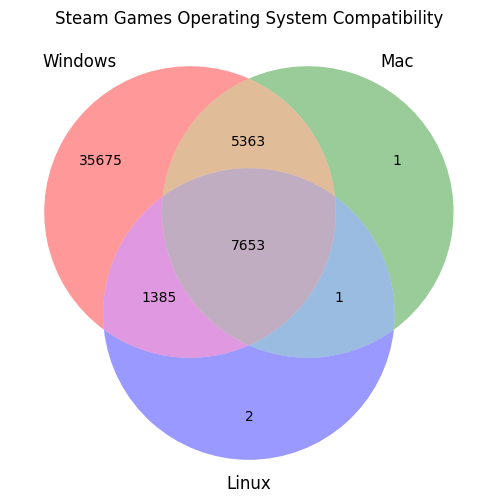

In [16]:
plt.figure(figsize = (10,6))
venn3_unweighted(subsets=(35675, 1, 5363, 2, 1385, 1, 7653), set_labels=("Windows", "Mac", "Linux"))
plt.title("Steam Games Operating System Compatibility")
plt.show()

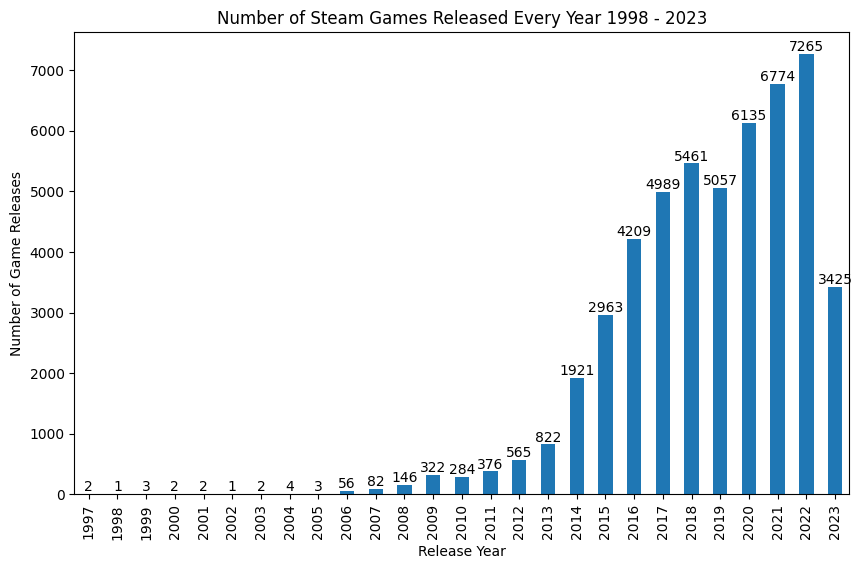

In [17]:
# Find Number of Titles Relesed per Year
fig = plt.figure(figsize=(10,6))
ax = games_df.sort_values(by = "date_release")["date_release"].dt.year.value_counts(sort=False).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel("Release Year")
plt.ylabel("Number of Game Releases")
plt.title("Number of Steam Games Released Every Year 1998 - 2023")
for txt in fig.texts:
    txt.set_visible(False)

Text(0, 0.5, 'Price (USD)')

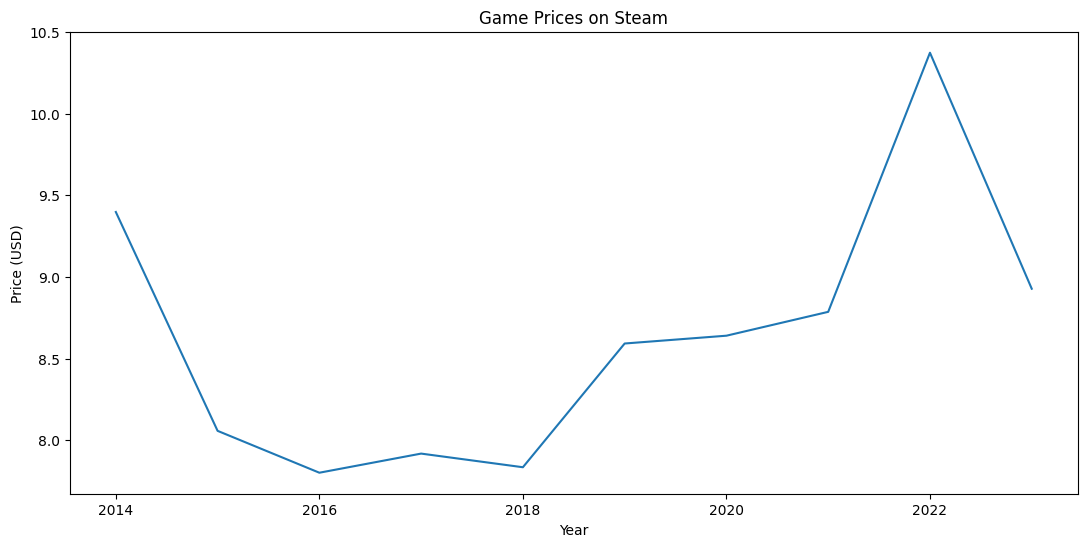

In [18]:
# Investigate Trends in Game Pricing
# Plot the Average Game Price Starting from 2014 (reach at least 1000 games)
plt.figure(figsize=(13,6))
games_df[games_df["date_release"] >= '2014-01-01'].groupby(games_df["date_release"].dt.year)["price_original"].mean().plot()
plt.title("Game Prices on Steam")
plt.xlabel("Year")
plt.ylabel("Price (USD)")

We see that 2016 had the lowest average prices while 2022 had the highest average prices. Since we also know that 2022 had the most number of titles released, this indicates that most of the games sold in 2022 were high price AAA games.

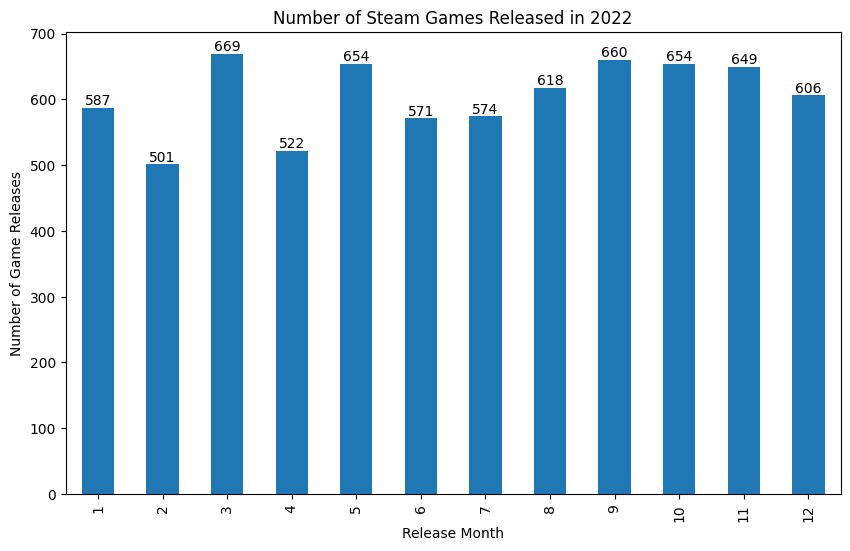

In [19]:
# Investigate 2022 games

# Number of Games
fig = plt.figure(figsize=(10,6))
ax = games_df[games_df["date_release"].dt.year == 2022].sort_values(by = "date_release")["date_release"].dt.month.value_counts(sort=False).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel("Release Month")
plt.ylabel("Number of Game Releases")
plt.title("Number of Steam Games Released in 2022")
for txt in fig.texts:
    txt.set_visible(False)

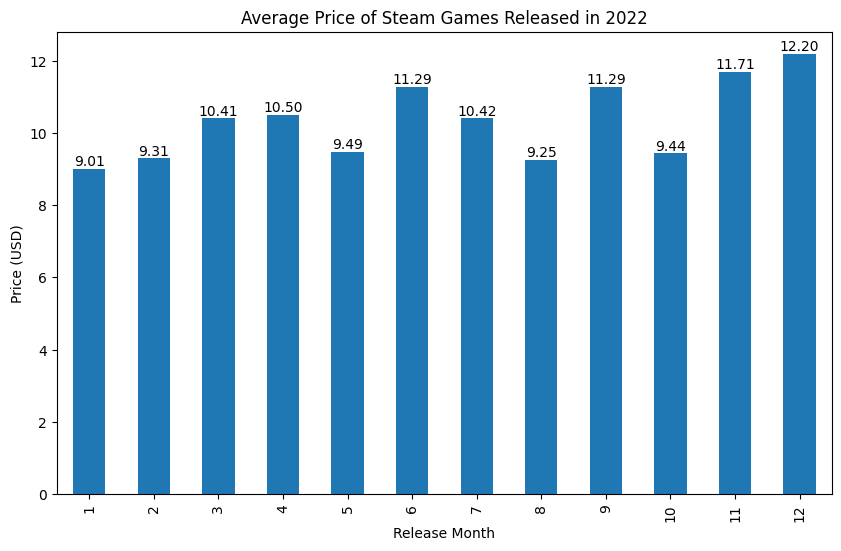

In [20]:
# Price of Games
fig = plt.figure(figsize=(10,6))
ax = games_df[games_df["date_release"].dt.year == 2022].groupby(games_df["date_release"].dt.month)["price_original"].mean().plot.bar()
ax.bar_label(ax.containers[0], fmt = "%.2f", label_type='edge')
plt.xlabel("Release Month")
plt.ylabel("Price (USD)")
plt.title("Average Price of Steam Games Released in 2022")
for txt in fig.texts:
    txt.set_visible(False)

In [21]:
games_df["rating"].value_counts()

rating
Positive                   13502
Very Positive              13139
Mixed                      12157
Mostly Positive             8738
Mostly Negative             1849
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: count, dtype: int64

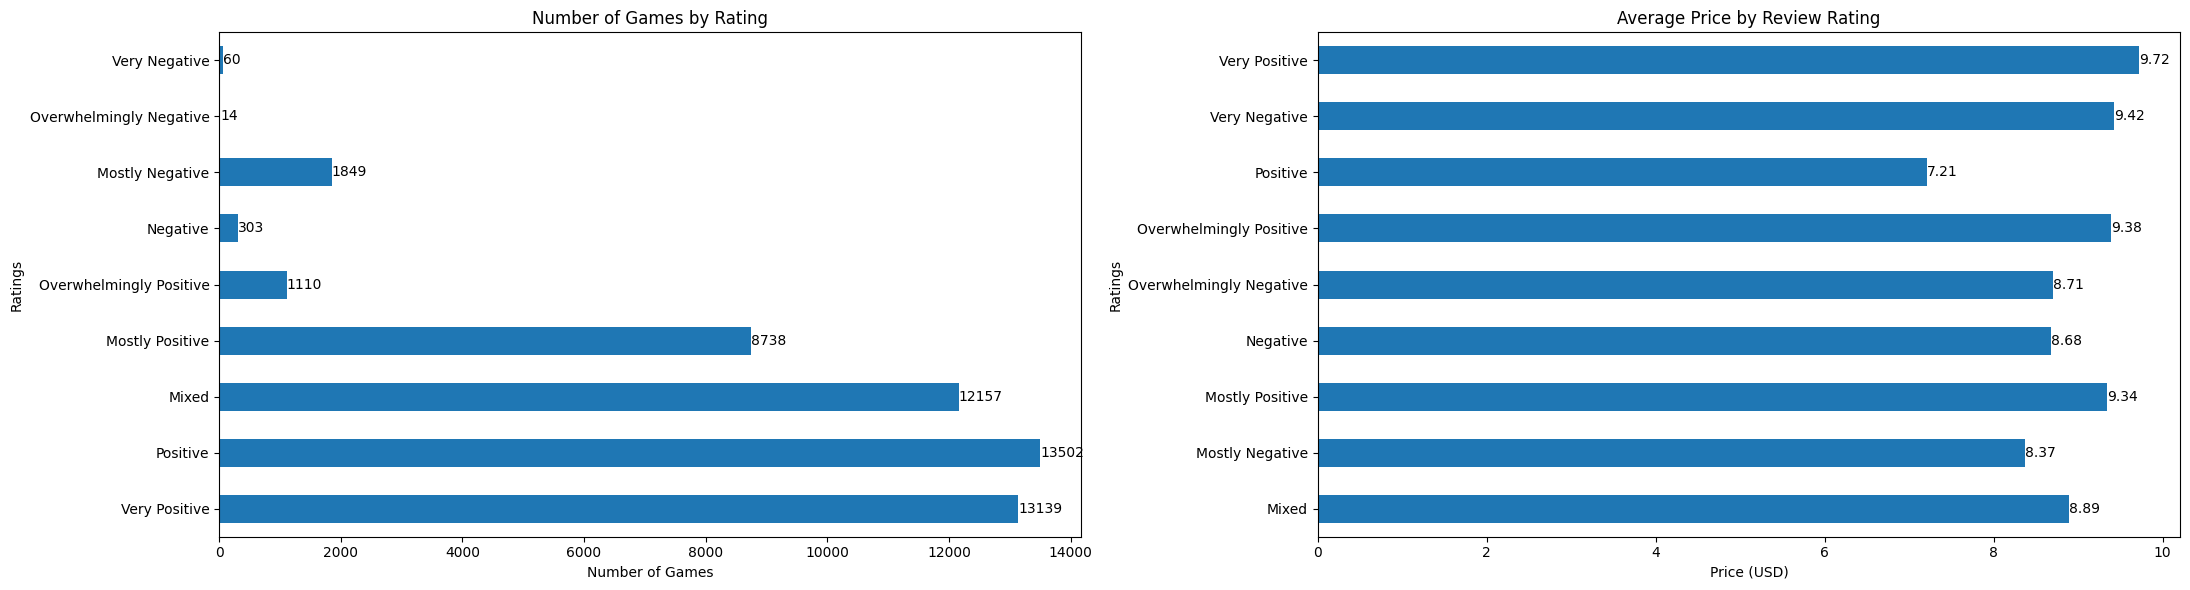

In [22]:
# Find the price of games based on their reviews

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

games_df["rating"].value_counts(sort = False).plot.barh(ax = axes[0])
games_df.groupby("rating")["price_original"].mean().plot.barh(ax = axes[1])
axes[0].set_title("Number of Games by Rating")
axes[1].set_title("Average Price by Review Rating")
axes[0].set_xlabel("Number of Games")
axes[1].set_xlabel("Price (USD)")
axes[0].set_ylabel("Ratings")
axes[1].set_ylabel("Ratings")

axes[0].bar_label(axes[0].containers[0], fmt = "%.0f", label_type='edge')
axes[1].bar_label(axes[1].containers[0], fmt = "%.2f", label_type='edge')

plt.tight_layout()
plt.show()

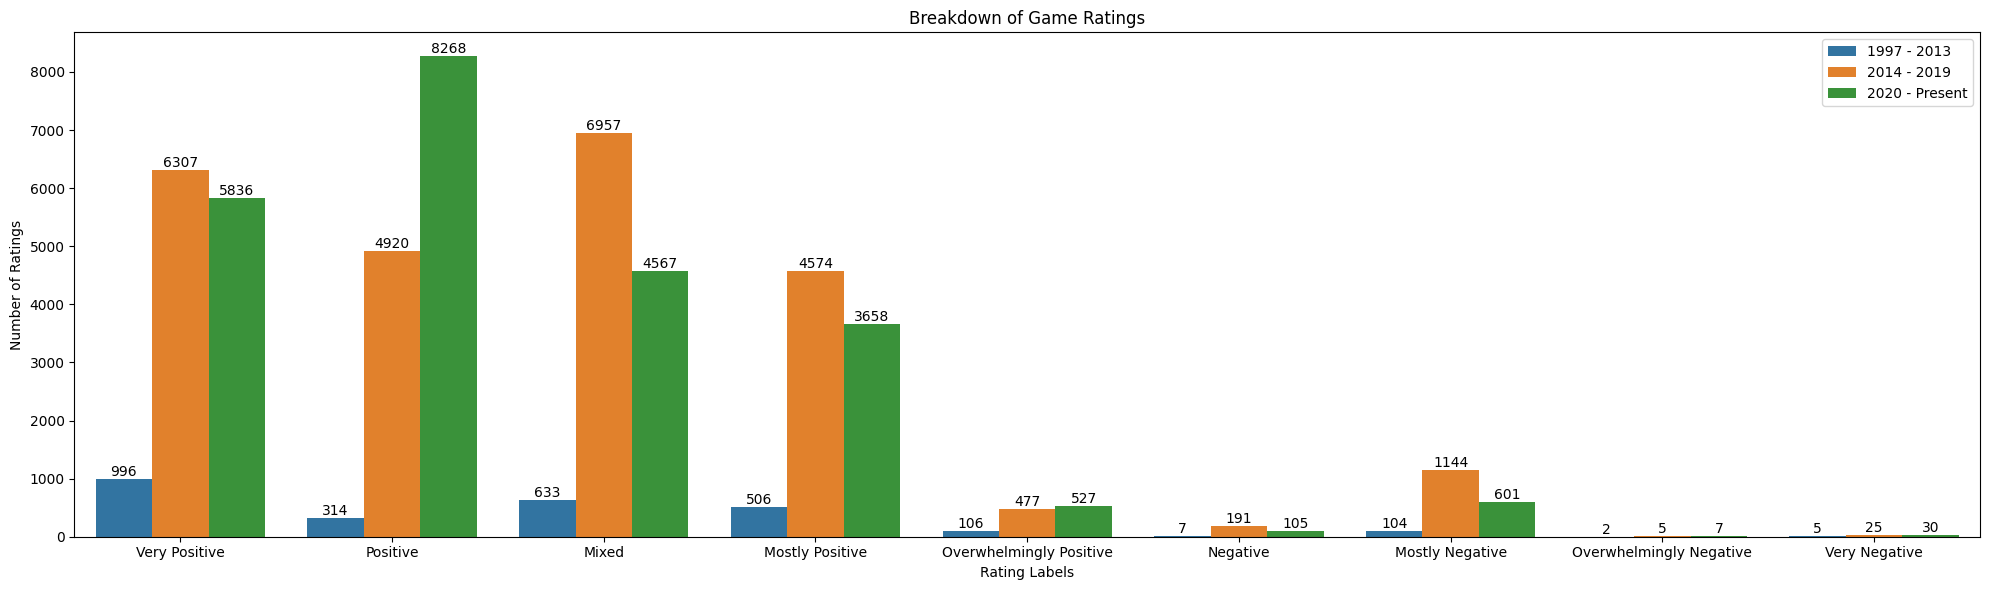

In [23]:
# Observe rating reviews over a period of time

# Look at beginning to 2013, 2014 - 2019, 2020 - current
period_1 = games_df[games_df["date_release"].dt.year <= 2013]
period_2 = games_df[(games_df["date_release"].dt.year >= 2014) & (games_df["date_release"].dt.year <= 2019)]
period_3 = games_df[games_df["date_release"].dt.year >= 2020]

ratings = list(np.repeat(games_df["rating"].unique(), 3))
periods = ["1997 - 2013", "2014 - 2019", "2020 - Present"] * 9
values = []
# Create the dictionary to plot
for rating in list(dict.fromkeys(ratings)):
    period_1_rating = len(period_1[period_1["rating"] == rating].index)
    period_2_rating = len(period_2[period_2["rating"] == rating].index)
    period_3_rating = len(period_3[period_3["rating"] == rating].index)
    values.append(period_1_rating)
    values.append(period_2_rating)
    values.append(period_3_rating)

period_ratings_dict = {
    "Ratings" : ratings,
    "Periods" : periods,
    "Values" : values
}

plt.figure(figsize=(20,6))
ax = sns.barplot(data = period_ratings_dict, x = "Ratings", y = "Values", hue = "Periods")
for c in ax.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.title("Breakdown of Game Ratings")
plt.xlabel("Rating Labels")
plt.ylabel("Number of Ratings")
plt.tight_layout()


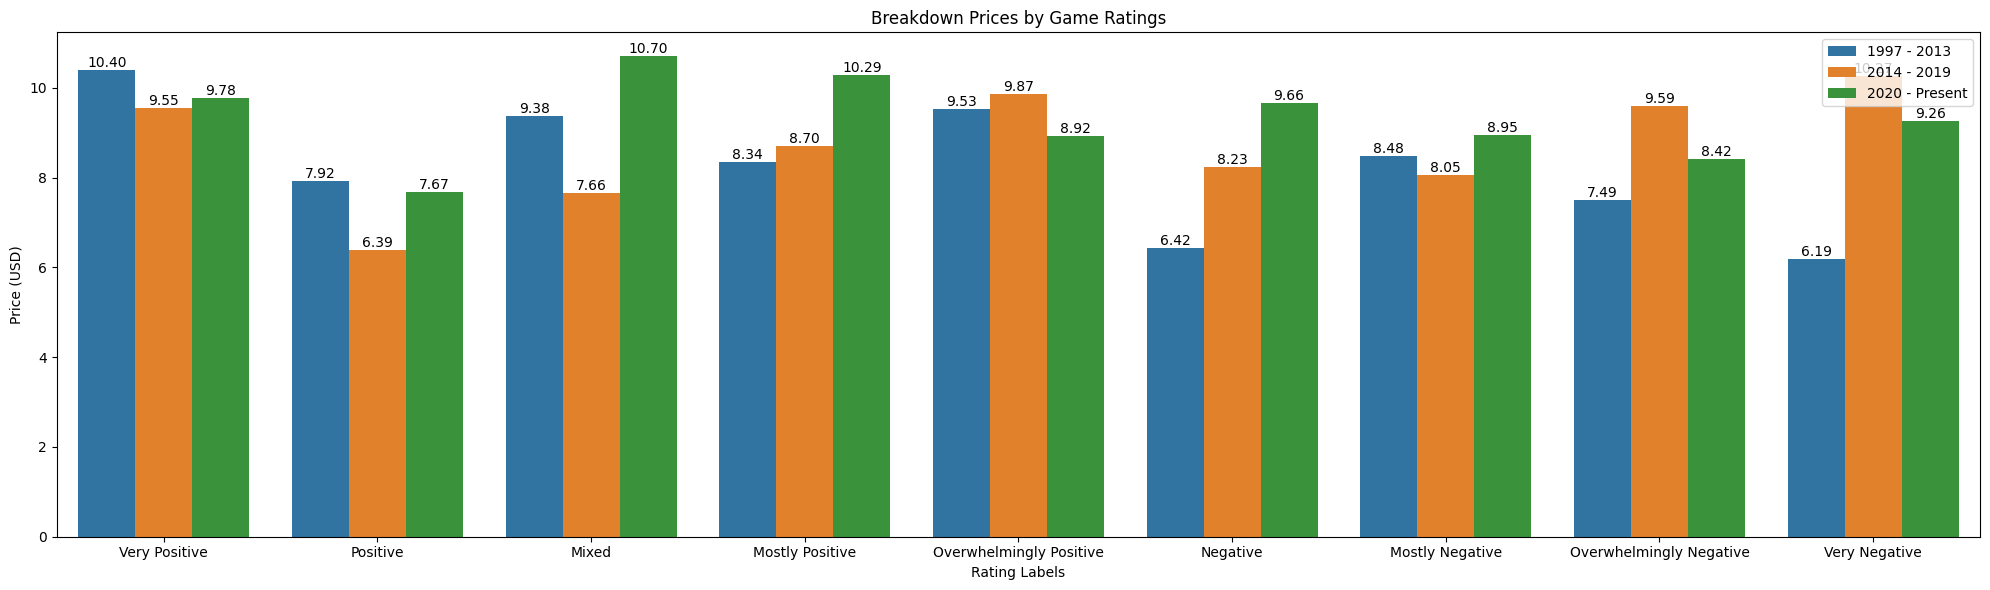

In [24]:
# Average Price of Games in Each Period
price_values = []

for rating in list(dict.fromkeys(ratings)):
    period_1_rating_price = period_1[period_1["rating"] == rating]["price_original"].mean().round(2)
    period_2_rating_price = period_2[period_2["rating"] == rating]["price_original"].mean().round(2)
    period_3_rating_price = period_3[period_3["rating"] == rating]["price_original"].mean().round(2)
    price_values.append(period_1_rating_price)
    price_values.append(period_2_rating_price)
    price_values.append(period_3_rating_price)

period_ratings_dict["Prices"] = price_values

plt.figure(figsize=(20,6))
ax = sns.barplot(data = period_ratings_dict, x = "Ratings", y = "Prices", hue = "Periods")
for c in ax.containers:
    labels = [f'{v.get_height():.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.title("Breakdown Prices by Game Ratings")
plt.xlabel("Rating Labels")
plt.ylabel("Price (USD)")
plt.tight_layout()

<Axes: >

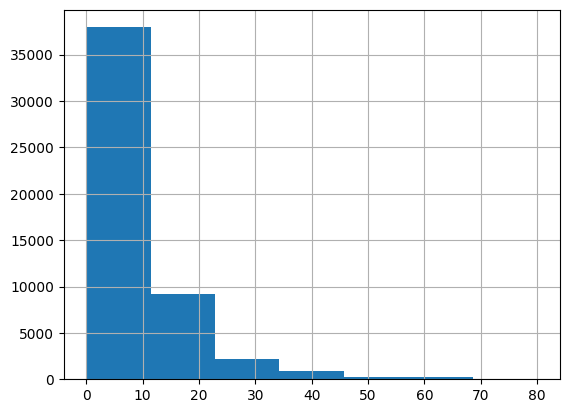

In [25]:
games_df[games_df["price_original"] <= 80]["price_original"].hist(bins = 7)

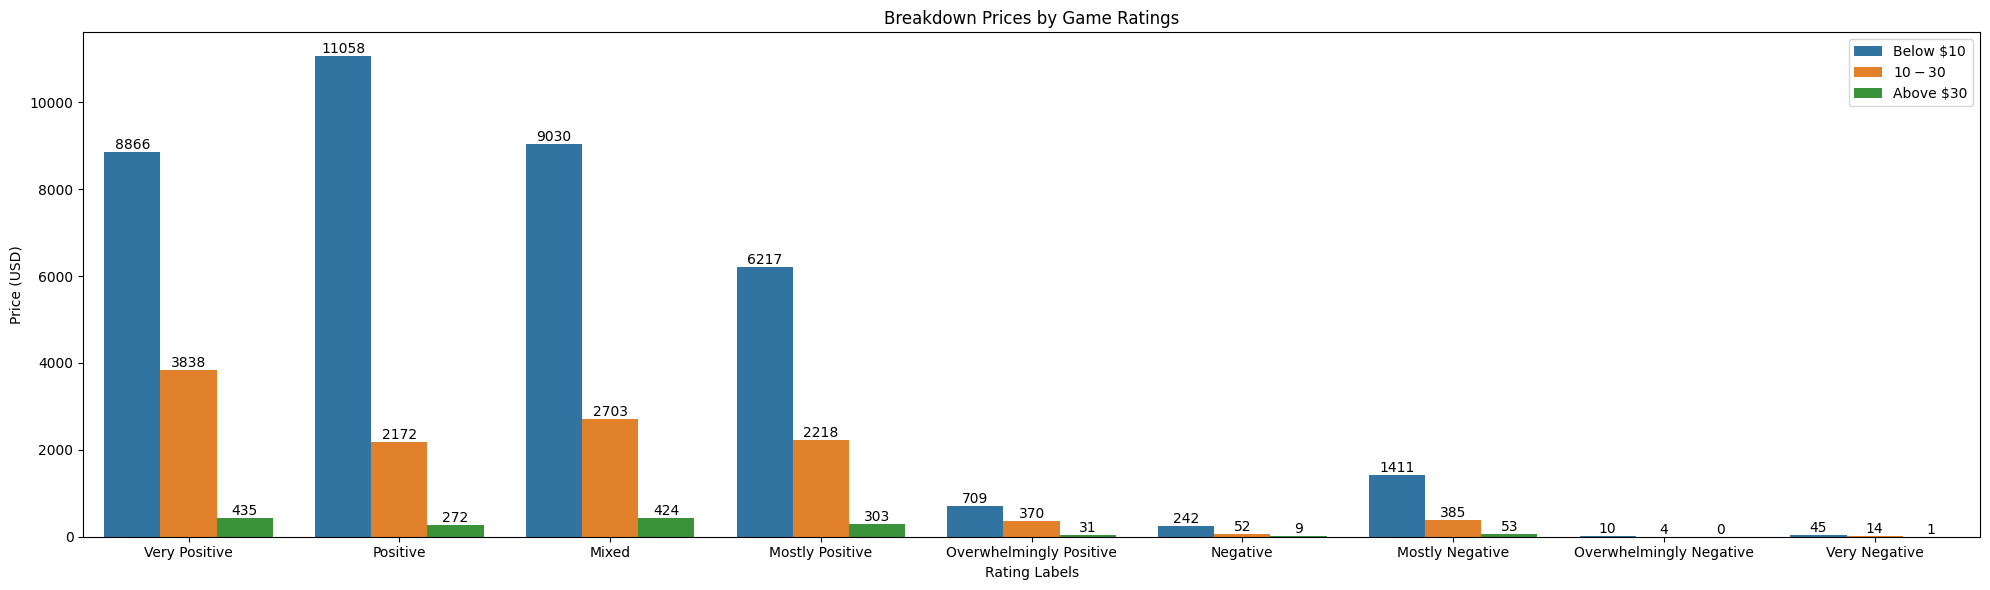

In [26]:
# Breakdown ratings by price (0 - 10, 10 - 30, 30+)
below_10_df = games_df[games_df["price_original"] <= 10]
between_10_30_df = games_df[(games_df["price_original"] > 10) & (games_df["price_original"] <= 30)]
greater_30_df = games_df[games_df["price_original"] > 30]

price_cutoffs = ["Below $10", "$10 - $30", "Above $30"] * 9

price_per_rating = []

for rating in list(dict.fromkeys(ratings)):
    num_below_10 = len(below_10_df[below_10_df["rating"] == rating].index)
    num_between_10_30 = len(between_10_30_df[between_10_30_df["rating"] == rating].index)
    num_above_30 = len(greater_30_df[greater_30_df["rating"] == rating].index)
    price_per_rating.append(num_below_10)
    price_per_rating.append(num_between_10_30)
    price_per_rating.append(num_above_30)

period_ratings_dict["Prices"] = price_values
period_ratings_dict["Price Cutoffs"] = price_cutoffs
period_ratings_dict["Price per Rating"] = price_per_rating 

plt.figure(figsize=(20,6))
ax = sns.barplot(data = period_ratings_dict, x = "Ratings", y = "Price per Rating", hue = "Price Cutoffs")
for c in ax.containers:
    labels = [f'{v.get_height():.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.title("Breakdown Prices by Game Ratings")
plt.xlabel("Rating Labels")
plt.ylabel("Price (USD)")
plt.tight_layout()

In [27]:
games_df["discount"].value_counts()

discount
0.0     45903
50.0      861
90.0      727
75.0      377
20.0      319
        ...  
58.0        1
41.0        1
79.0        1
39.0        1
9.0         1
Name: count, Length: 75, dtype: int64

In [28]:
# Descriptive Statistics on Price 
games_df["discount"].describe(), games_df[games_df["discount"] > 0]["discount"].describe()

(count    50872.000000
 mean         5.592212
 std         18.606679
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max         90.000000
 Name: discount, dtype: float64,
 count    4969.000000
 mean       57.252365
 std        24.224409
 min         9.000000
 25%        40.000000
 50%        60.000000
 75%        75.000000
 max        90.000000
 Name: discount, dtype: float64)

Text(0.5, 1.0, 'Number of Discounted Games by Release Year')

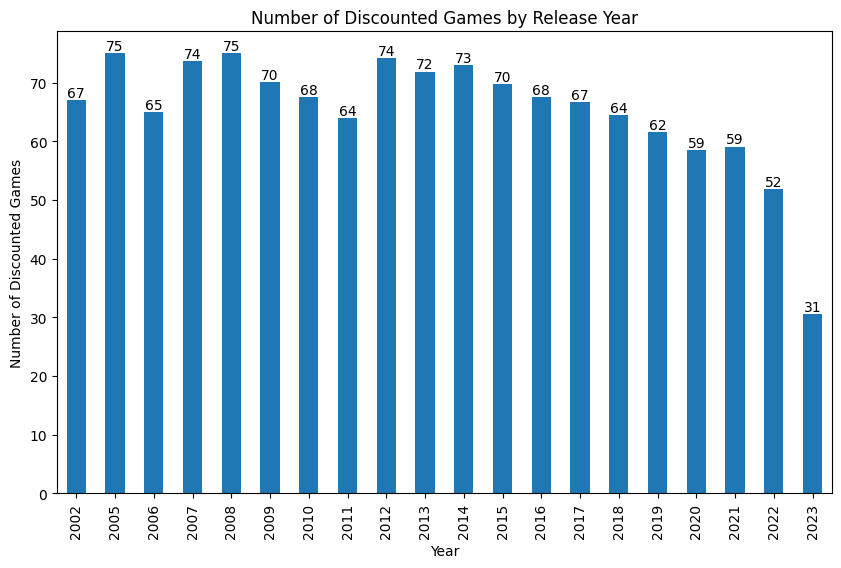

In [49]:
# Show which year had the most discounts in price (assuming there was a discount) 
plt.figure(figsize=(10,6))
ax = games_df[games_df["discount"] > 0].groupby(games_df["date_release"].dt.year)["discount"].mean().plot.bar()
for i in ax.containers:
        ax.bar_label(i, fmt = "%.0f")
plt.xlabel("Year")
plt.ylabel("Number of Discounted Games")
plt.title("Number of Discounted Games by Release Year")

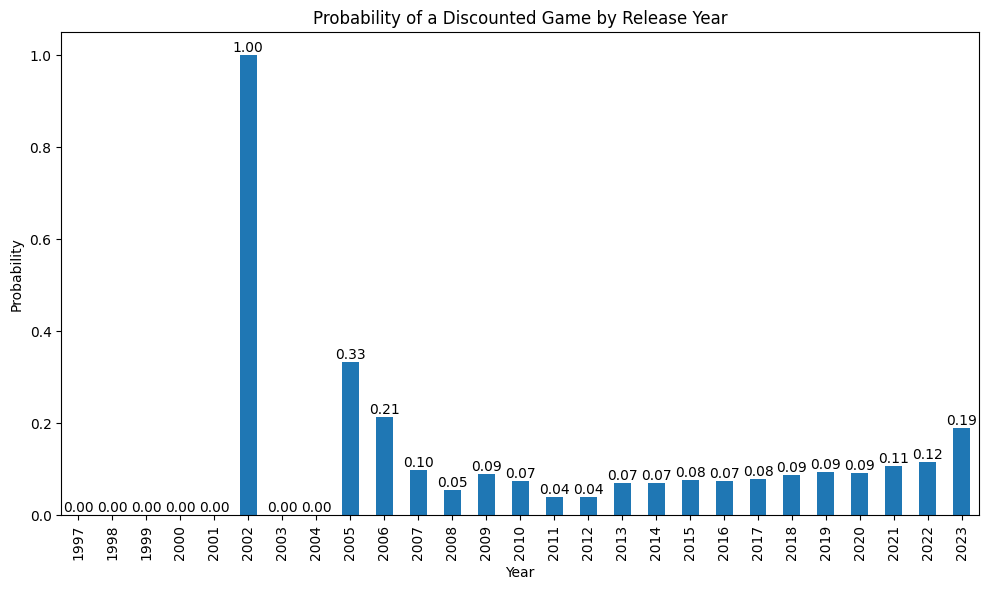

In [47]:
# Which year games would have the highest probability of a sale
plt.figure(figsize=(10,6))
ax = (games_df[games_df["discount"] > 0].groupby(games_df["date_release"].dt.year)["discount"].count() / games_df.groupby(games_df["date_release"].dt.year)["discount"].count()).fillna(value = 0).plot.bar()
for i in ax.containers:
        ax.bar_label(i, fmt = "%.2f")

plt.title("Probability of a Discounted Game by Release Year")
plt.xlabel("Year")
plt.ylabel("Probability")
plt.tight_layout()

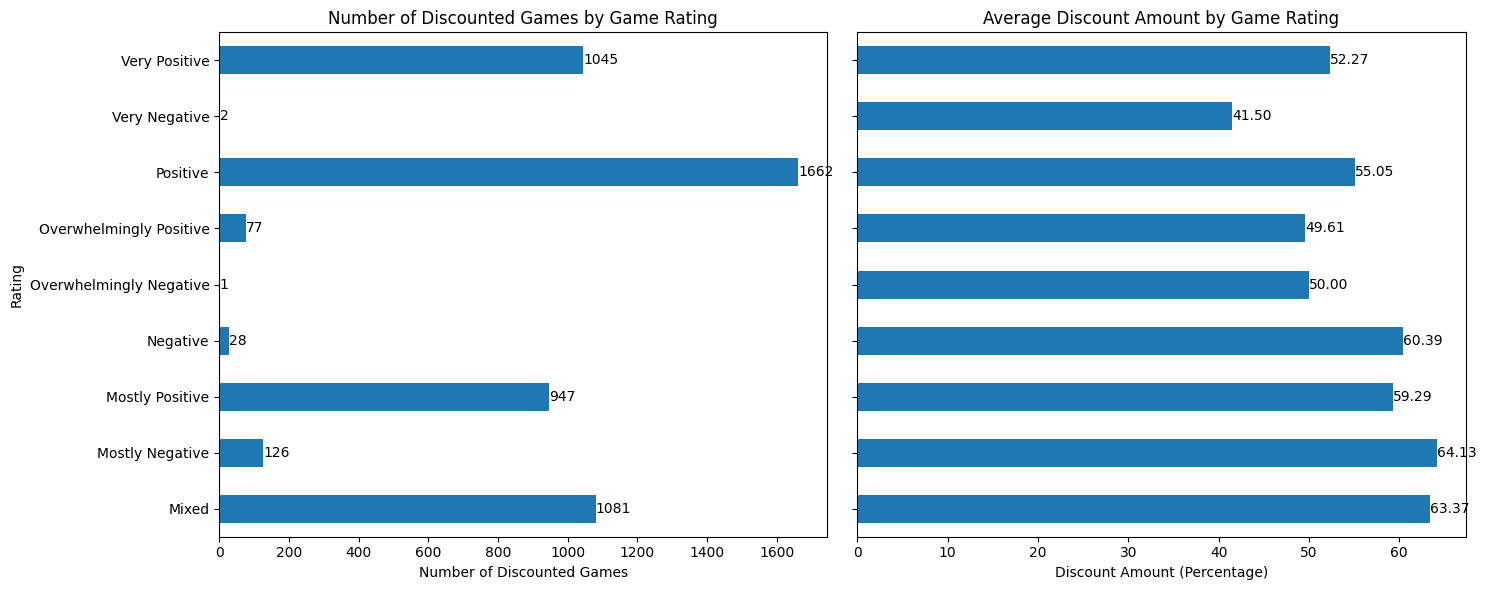

In [30]:
# Breakdown discounts and ratings (Do high rated games mean higher or lower discounts)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,6), sharey=True)
axes[0] = games_df[games_df["discount"] > 0].groupby("rating")["discount"].count().plot.barh(ax = axes[0])
axes[1] = games_df[games_df["discount"] > 0].groupby("rating")["discount"].mean().plot.barh(ax = axes[1])
axes[0].set_ylabel("Rating")
axes[0].set_xlabel("Number of Discounted Games")
axes[1].set_xlabel("Discount Amount (Percentage)")
axes[0].set_title("Number of Discounted Games by Game Rating")
axes[1].set_title("Average Discount Amount by Game Rating")

for i in axes[0].containers:
        axes[0].bar_label(i,)

for i in axes[1].containers:
        axes[1].bar_label(i, fmt = "%.2f")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of Games with Higher Final Price than Original Price (All Games Originally Free)')

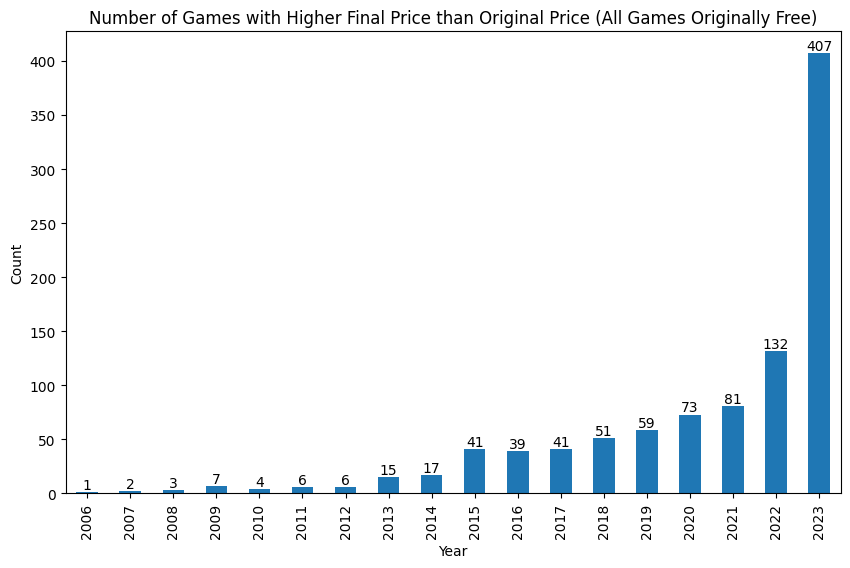

In [63]:
# Number of games by year where the final price is greater than the original price
plt.figure(figsize=(10,6))
ax = games_df[games_df["price_original"] < games_df["price_final"]].groupby(games_df["date_release"].dt.year)["title"].count().plot.bar()
for i in ax.containers:
        ax.bar_label(i, fmt = "%.0f")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Games with Higher Final Price than Original Price (All Games Originally Free)")